In [112]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Dense, Flatten, Softmax, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets.mnist import load_data

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from scikeras.wrappers import KerasClassifier

In [97]:
# Load the MNIST data
(x_trainval, y_trainval), (x_test, y_test) = load_data()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

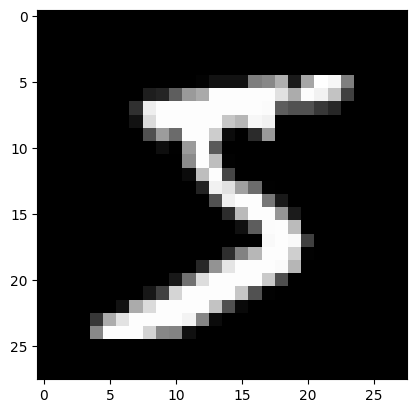

In [98]:
# Display sample data
print(x_trainval[0])
plt.imshow(x_trainval[0], cmap='gray')

In [99]:
# Show the shape of the data to verify the size of the provided partitions
print(f'{x_trainval.shape} {x_test.shape}')

(60000, 28, 28) (10000, 28, 28)


In [100]:
# Split training data into training and validation data
x_train, x_val, y_train, y_val = train_test_split(x_trainval, y_trainval, test_size=10000, stratify=y_trainval)
print(f'{x_train.shape} {x_val.shape}')


(50000, 28, 28) (10000, 28, 28)


In [101]:
y_train[0]

np.uint8(2)

In [117]:
# Normalize the data
x_trainval = x_trainval / 255.0
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

# Add extra dimension for channels
x_trainval = x_trainval[..., tf.newaxis]
x_train = x_train[..., tf.newaxis]
x_val = x_val[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Convert to 32 bit floating point
x_trainval = x_trainval.astype('float32')
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

In [118]:
nn1 = Sequential()
nn1.add(Input(shape=(28,28,1)))
nn1.add(Flatten())
nn1.add(Dense(380))
nn1.add(Dropout(rate=0.2))
nn1.add(Dense(80))
nn1.add(Dense(10, activation='softmax'))

nn1.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    metrics=['accuracy'])

In [119]:
nn1.fit(x_train, y_train, epochs=5, batch_size=5, validation_data=(x_val, y_val))

Epoch 1/5
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8642 - loss: 0.4524 - val_accuracy: 0.9063 - val_loss: 0.3388
Epoch 2/5
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9050 - loss: 0.3286 - val_accuracy: 0.9040 - val_loss: 0.3329
Epoch 3/5
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9081 - loss: 0.3160 - val_accuracy: 0.8987 - val_loss: 0.3657
Epoch 4/5
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9116 - loss: 0.3073 - val_accuracy: 0.9160 - val_loss: 0.3101
Epoch 5/5
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9133 - loss: 0.3019 - val_accuracy: 0.9006 - val_loss: 0.3399


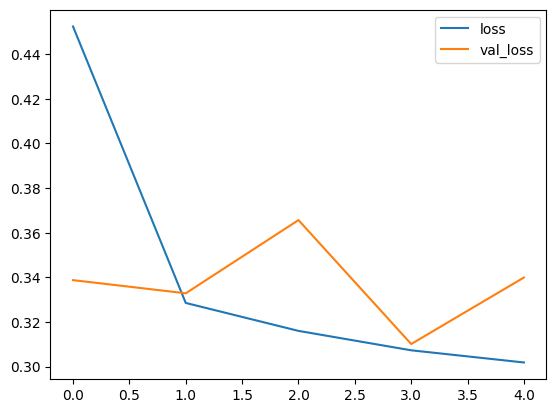

In [120]:
plt.plot(nn1.history.history['loss'], label='loss')
plt.plot(nn1.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [106]:
nn1.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0709 - loss: 2.5993


[2.599270820617676, 0.07090000063180923]

In [111]:
def create(num_layers, hidden_neurons1=380, hidden_neurons2=80, activation='sigmoid'):
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Flatten(),
        Dense(hidden_neurons1, activation=activation), 
        Dense(hidden_neurons2, activation=activation),
        Dense(10, activation='linear'),
        Softmax()
    ])
    model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
    return model

nn_tuned = KerasClassifier(create, epochs=5, batch_size=5, hidden_neurons1=380, hidden_neurons2=80, activation='sigmoid')

nn_tuned_params = {
    'hidden_neurons1': [64, 128, 180], 
    'hidden_neurons2': [32, 64, 80], 
    'activation': ['sigmoid', 'relu'], 
}
grid_nn = GridSearchCV(nn_tuned, nn_tuned_params, n_jobs=16)
grid_nn.fit(x_trainval, y_trainval)

2025-11-12 11:05:28.170925: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-12 11:05:28.222270: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-12 11:05:28.231141: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-12 11:05:28.254205: I tensorflow/core/util/port.cc:153] oneDNN custom operations ar

Epoch 1/5
Epoch 1/5
Epoch 1/5
Epoch 1/5


2025-11-12 11:05:30.813330: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-12 11:05:30.816714: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-12 11:05:30.832921: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-12 11:05:30.846790: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly 

Epoch 1/5
Epoch 1/5
Epoch 1/5


2025-11-12 11:05:31.297489: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-11-12 11:05:31.297525: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:171] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-11-12 11:05:31.297529: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:176] retrieving CUDA diagnostic information for host: Tesla
2025-11-12 11:05:31.297533: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] hostname: Tesla
2025-11-12 11:05:31.297677: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] libcuda reported version is: 580.95.5
2025-11-12 11:05:31.297707: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:194] kernel reported version is: 580.95.5
2025-11-12 

Epoch 1/5
Epoch 1/5
   1/9600 ━━━━━━━━━━━━━━━━━━━━ 3:26:12 1s/step - accuracy: 0.0000e+00 - loss: 2.3860Epoch 1/5
  29/9600 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - accuracy: 0.0922 - loss: 2.4120Epoch 1/5
Epoch 1/5


2025-11-12 11:05:31.826588: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-11-12 11:05:31.826793: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:171] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-11-12 11:05:31.826809: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:176] retrieving CUDA diagnostic information for host: Tesla
2025-11-12 11:05:31.826815: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] hostname: Tesla
2025-11-12 11:05:31.826946: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] libcuda reported version is: 580.95.5
2025-11-12 11:05:31.827044: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:194] kernel reported version is: 580.95.5
2025-11-12 

  41/9600 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.1020 - loss: 2.3917Epoch 1/5
  83/9600 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - accuracy: 0.1338 - loss: 2.3384Epoch 1/5
Epoch 1/5
  43/9600 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - accuracy: 0.1428 - loss: 2.3227

2025-11-12 11:05:32.031322: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-11-12 11:05:32.031701: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:171] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-11-12 11:05:32.031781: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:176] retrieving CUDA diagnostic information for host: Tesla
2025-11-12 11:05:32.031829: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] hostname: Tesla
2025-11-12 11:05:32.032024: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] libcuda reported version is: 580.95.5
2025-11-12 11:05:32.032161: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:194] kernel reported version is: 580.95.5
2025-11-12 

 149/9600 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - accuracy: 0.1799 - loss: 2.2805Epoch 1/5
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.7987 - loss: 0.6786
9246/9600 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7064 - loss: 0.9842Epoch 2/5
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - accuracy: 0.7946 - loss: 0.6871
Epoch 2/5
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.7940 - loss: 0.6955
Epoch 2/5
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.7898 - loss: 0.7341
Epoch 2/5
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.7978 - loss: 0.7125
Epoch 2/5
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.7870 - loss: 0.7337
9334/9600 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7189 - loss: 0.9678Epoch 2/5
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.8019 - loss: 0.6616
Epoch 2/5
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.8035 - loss: 0.6669
Epoch 2/5
9600/9600 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0

KeyboardInterrupt: 

In [ ]:
input = Input(shape=(28,28,1))
flatten = Flatten()
dense1 = Dense(380)(flatten)
dense2 = Dense(180)(dense1) + Dense(180)(flatten)
output = Dense(10, activation='softmax')

model = tf.keras.models.Model(input=input, outputs=output)